# Business Case
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

* Also, determine the optimal value of lambda for ridge and lasso regression.


# Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Coding Guidelines:

* Appropriate comments are written wherever applicable.

 

 

 

* If new variables are created, the names are descriptive and unambiguous.

 

 

* The code is written concisely, wherever possible.

 

 

 

* Overall, the code is readable and has appropriate indentations.

 

* The GitHub repository link contains a python file, PDF file and a README.md file. README.md file should describe the project briefly.

# Import Essential Packages 

In [1]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization

import seaborn as sns #for visualization

%matplotlib inline 

import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Data Understanding & Preparation

## Qualitative Goals:

* All data quality checks are performed, and all data quality issues are addressed in the right way (missing value imputation, removing duplicate data and other kinds of data redundancies, etc.). Data quality issues are clearly explained in comments.

 
* Dummy variables are created properly, wherever applicable.

 
* New metrics are derived, if applicable, and are used for analysis and modelling.

 
* The data is converted to a clean format suitable for analysis.

In [2]:
housing_base_data = pd.read_csv('train.csv')

In [3]:
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1.2 Understanding data and taking quality measures

In [5]:
#let's analyze 'MSZoning'; based on data dictionary let's convert it as categorical variable
housing_base_data['MSZoning'] = housing_base_data['MSZoning'].astype('category')

In [6]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [7]:
# let's analyze LotFrontage
housing_base_data['LotFrontage'].isna().sum()

259

In [8]:
# let's check relationship between 'LotFrontage' and 'SalePrice'

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

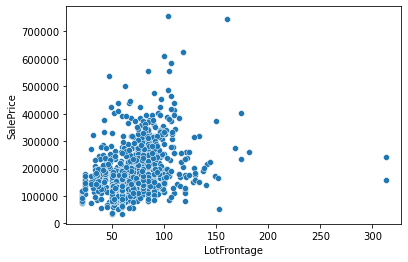

In [9]:
sns.scatterplot(data=housing_base_data, x=housing_base_data['LotFrontage'], y='SalePrice')

### Observation:
* There are <b>259</b> missing values
* There is no CLEAR relationship between independent feature viz. LotFrontage and SalePrice

### Missing value handling
* <b>Imputation technique</b>: Let's drop column "LotFrontage"

In [10]:
housing_base_data_01 = housing_base_data.drop(columns='LotFrontage', axis=1)
housing_base_data_01.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
housing_base_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [12]:
#let's analyze 'Street' column
housing_base_data_01['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [13]:
#let's convert 'Street' as Categorical variable
housing_base_data_01['Street'] = housing_base_data_01['Street'].astype('category')
housing_base_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [14]:
#let's analyze 'Alley' column
housing_base_data_01['Alley'].isna().sum()

1369

### Observation
* About 84% of entries has NA
### Missing Value Handling
* let's drop the column 'Alley'


In [15]:
housing_data_02 = housing_base_data_01.drop(columns='Alley', axis=1)
housing_data_02.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
housing_data_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [17]:
# let's analyze 'LotShape'
housing_data_02['LotShape'].isna().sum()

0

In [18]:
housing_data_02['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [19]:
# let's convert 'LotShape' as Categorical variable
housing_data_02['LotShape'] = housing_data_02['LotShape'].astype('category')

In [20]:
housing_data_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [21]:
# let's analyze LandContour
housing_data_02['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [22]:
#let's convert 'LandContour' as Categorical Variable
housing_data_02['LandContour'] = housing_data_02['LandContour'].astype('category')

In [23]:
housing_data_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [24]:
#let's analyze 'Utilities'
housing_data_02['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Observation 
* All entries has same value except 1
### Data Handling
* Let's drop this column as it may not bring much of difference due to similar values for all training set

In [25]:
# let's drop column 'Utilities'
housing_data_03 = housing_data_02.drop(columns='Utilities', axis=1)
housing_data_03.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
housing_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [27]:
# let's analyze column 'LotConfig'
housing_data_03['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [28]:
#let's convert column 'LotConfig' as Categorical variable
housing_data_03['LotConfig'] = housing_data_03['LotConfig'].astype('category')
housing_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [29]:
# let's analyze column 'LandSlope'
housing_data_03['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [30]:
#let's convert column 'LandSlope' as Categorical variable
housing_data_03['LandSlope'] = housing_data_03['LandSlope'].astype('category')
housing_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [31]:
#let's analyze column 'Neighborhood'
housing_data_03['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [32]:
# let's convert column 'Neighborhood' as Categorical variable
housing_data_03['Neighborhood'] = housing_data_03['Neighborhood'].astype('category')
housing_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [33]:
# let's analyze column 'Condition1'
housing_data_03['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [34]:
# let's convert column 'Condition1' as Categorical variable
housing_data_03['Condition1'] = housing_data_03['Condition1'].astype('category')
housing_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  Condition1     1460 non-null   category
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [35]:
# let's analyze column 'Condition2'
housing_data_03['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

### Observation 
* Values for columns 'Condition1' and 'Condition2' are similar
* Distribution of values are not similar; there is likely chance of inconsistent data
* also it seems 86% & above has same value viz. "Norm"
### Data handling
* Let's drop this column since there is no much variance in data here

In [36]:
housing_data_04 = housing_data_03.drop(columns=['Condition1', 'Condition2'], axis=1)
housing_data_04.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
housing_data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  BldgType       1460 non-null   object  
 11  HouseStyle     1460 non-null   object  
 12  OverallQual    1460 non-null   int64   
 13  OverallCond    1460 non-null   int64   
 14  YearBuilt      1460 non-null   int64   
 15  YearRemodAdd   1460 non-null   int64   
 16  RoofStyle      1460 non-null   object  
 17  RoofMatl       1460 non-null   ob

In [38]:
housing_data_04['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [39]:
housing_data_04['BldgType'] = housing_data_04['BldgType'].astype('category')
housing_data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   object  
 12  OverallQual    1460 non-null   int64   
 13  OverallCond    1460 non-null   int64   
 14  YearBuilt      1460 non-null   int64   
 15  YearRemodAdd   1460 non-null   int64   
 16  RoofStyle      1460 non-null   object  
 17  RoofMatl       1460 non-null   ob

In [40]:
# let's analyze column 'HouseStyle'
housing_data_04['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [41]:
# let's convert column 'HouseStyle' as Categorical variable
housing_data_04['HouseStyle'] = housing_data_04['HouseStyle'].astype('category')
housing_data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  OverallQual    1460 non-null   int64   
 13  OverallCond    1460 non-null   int64   
 14  YearBuilt      1460 non-null   int64   
 15  YearRemodAdd   1460 non-null   int64   
 16  RoofStyle      1460 non-null   object  
 17  RoofMatl       1460 non-null   ob

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

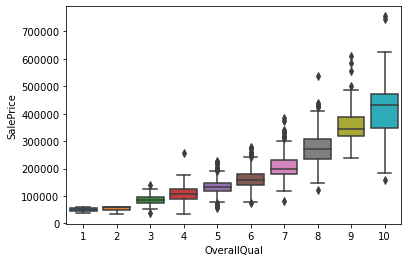

In [42]:
#let's analyze column 'OverallQual' and relationship with "SalePrice"
sns.boxplot(data=housing_data_04, x=housing_data_04['OverallQual'], y='SalePrice')

### Observation
* Column 'OverallQual' is an ordered categorical data type
### Data Handling
* Let's create an ordered categorical variable 

In [43]:
from pandas.api.types import CategoricalDtype

In [44]:
housing_data_04['OverallQual'] = housing_data_04['OverallQual'].astype('category')
housing_data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  OverallQual    1460 non-null   category
 13  OverallCond    1460 non-null   int64   
 14  YearBuilt      1460 non-null   int64   
 15  YearRemodAdd   1460 non-null   int64   
 16  RoofStyle      1460 non-null   object  
 17  RoofMatl       1460 non-null   ob

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

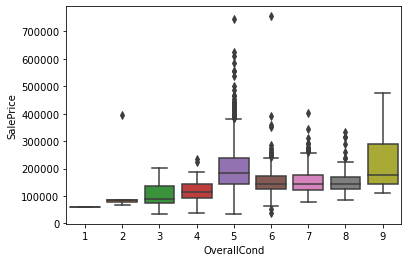

In [46]:
# let's analyze column 'OverallCond'
sns.boxplot(data=housing_data_04, x=housing_data_04['OverallCond'], y='SalePrice')

### Observation
* Median SalePrice has irregular pattern with ordered column 'OverallCond
### Data Handling
* let's convert column 'OverallCond' as Categorical variable for now

In [47]:
housing_data_04['OverallCond'] = housing_data_04['OverallCond'].astype('category')
housing_data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  OverallQual    1460 non-null   category
 13  OverallCond    1460 non-null   category
 14  YearBuilt      1460 non-null   int64   
 15  YearRemodAdd   1460 non-null   int64   
 16  RoofStyle      1460 non-null   object  
 17  RoofMatl       1460 non-null   ob

In [48]:
# let's analyze column 'YearBuilt'
housing_data_04['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

### Observation
* Column 'YearBuilt' provide year of built; this may not have much meaning
### Data Handling
* Let's create a new variable 'house-age' which shall make more sense for analyzing price variation against age of building

In [50]:
# let's import date class from datetime module
from datetime import date
today_date = date.today()
housing_data_04['house-age'] = housing_data_04['YearBuilt'].apply(lambda x: today_date.year - x)
housing_data_04.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22


# Step 2: Model Building and Evaluation

## Qualitative Goals: 

* Model parameters are tuned using correct principles, and the approach is explained clearly. Both the technical and business aspects are considered while building the model.

 

 

* Correct variable selection techniques are used. A reasonable number of different models are attempted, and the best one is chosen based on key performance metrics.

 

 

* Model evaluation is done using the correct principles, and appropriate evaluation metrics are chosen.

 

 

* The results are on par with the best possible model on the data set.

 
